In [1]:
#import program modules
import finvest as fv

# **Final Project**
## Comp 4447 - Data Science Tools 1
 **By Brian McCullough**

**Main Process :**
I wanted to build a process that would take a company that a user is interested in which gives context on how that company measures up compared to their nearest competitors in the same space of the market.

**DS Tools 1 processes :**
From the course, I applied the web scraping, html reading, visualizations and some regex.

**Other MS of DS processes :**
From other portions of the program, I am logging steps and processes for when the developement would break, heatmap correlations 

## **Process Overview**
The user is asked for a ticker symbol of a publicly traded company.\
Some examples (but not limited to):\
\
MSFT - Microsoft - technology company\
META - Meta (owner of Facebook) - communications services\
NOC - Northrup Grumman - industrials\
USB - U.S. Bancorp - financials

The first process will then web-scrape data about the company into a dataframe.  This data is then used to identify the Sector and Industry that this company competes in as well as determines some other company financial health characteristics to keep the comparisons as 'like-to-like' as possible.  This focuses on the Market Cap and the Debt levels of the given company and then creates a range around those characteristics to create the list of competitors.\
\
`Assign a ticker to the given ticker variable`

In [10]:
user_stock = 'RGR'

### Step 1: Pull basic stock information

In [11]:
main_stock_info = fv.stck_base_data(user_stock)
main_stock_info[['Ticker\n\n','Company','Sector','Industry','P/E','Debt/Eq','ROA','ROE','ROI']]

,Ticker\n\n,Company,Sector,Industry,P/E,Debt/Eq,ROA,ROE,ROI
0,RGR,"Sturm, Ruger & Company, Inc.",Industrials,Aerospace & Defense,14.51,0.00,15.70%,19.80%,26.40%


### Step 2: Find similar companies to the given stock ticker

In [12]:
sector_stock_info = fv.screen_stcks(main_stock_info)

Some quick info on the companies that were filtered into our data

In [13]:
lngth_df = len(sector_stock_info)
print(f"# of companies that fit the filters = {lngth_df}")
print(f"Sector: {sector_stock_info['Sector'][0]}   ///   Industry: {sector_stock_info['Industry'][0]}")
print(f"Market cap range(min-max): {sector_stock_info['Market Cap'].min()//1e6}M - {sector_stock_info['Market Cap'].max()//1e9}B")
print(f"Debt/Eq ratio range: {sector_stock_info['Debt/Eq'].min()} - {sector_stock_info['Debt/Eq'].max()}")


# of companies that fit the filters = 33
Sector: Industrials   ///   Industry: Aerospace & Defense
Market cap range(min-max): 20.0M - 143.0B
Debt/Eq ratio range: 0.0 - 0.33


In this example we have quite a few contenders for investment but we have no reference yet on how these companies are related in terms of financial quality and value in order to know where to spend our time researching into best opportunities for investing.\
So we need to *rank* our companies and see how they compare to each other.


In [14]:
ranked_stock_info = fv.rank_screener(sector_stock_info, user_stock)

In [15]:
print(ranked_stock_info.loc[ranked_stock_info['cat_grp'] == 1, ['Ticker\n\n','Company', 'cat_desc','Market Cap','P/E','P/S','P/B','P/FCF','EPS','ROA','ROE','ROI']])
print()
print(ranked_stock_info.loc[ranked_stock_info['cat_grp'] == 2, ['Ticker\n\n','Company','cat_desc','Market Cap','P/E','P/S','P/B','P/FCF','EPS','ROA','ROE','ROI']])
print()
print(ranked_stock_info.loc[ranked_stock_info['cat_grp'] == 3, ['Ticker\n\n','Company','cat_desc','Market Cap','P/E','P/S','P/B','P/FCF','EPS','ROA','ROE','ROI']])


  Ticker\n\n                       Company cat_desc   Market Cap    P/E   P/S  \
1        RGR  Sturm, Ruger & Company, Inc.     Main  977900000.0  14.51  1.68   

    P/B  P/FCF   EPS    ROA    ROE    ROI  
1  2.94    NaN  3.81  0.157  0.198  0.264  

  Ticker\n\n                                 Company  cat_desc   Market Cap  \
0       CODA                Coda Octopus Group, Inc.  Top Comp   88140000.0   
2        TGI                     Triumph Group, Inc.  Top Comp  581700000.0   
3       ISSC  Innovative Solutions and Support, Inc.  Top Comp  140320000.0   

     P/E   P/S   P/B  P/FCF   EPS    ROA    ROE    ROI  
0  18.10  3.95  1.78  97.93  0.43  0.100  0.108  0.096  
2   6.58  0.42   NaN    NaN  1.36  0.059 -0.129  0.222  
3  28.07  4.99  4.06  29.86  0.28  0.140  0.157  0.176  

   Ticker\n\n                       Company cat_desc    Market Cap    P/E  \
33      _AVG_  Sturm, Ruger & Company, Inc.  Grp Avg  8.062724e+09  54.43   

      P/S   P/B  P/FCF   EPS   ROA  ROE   ROI  

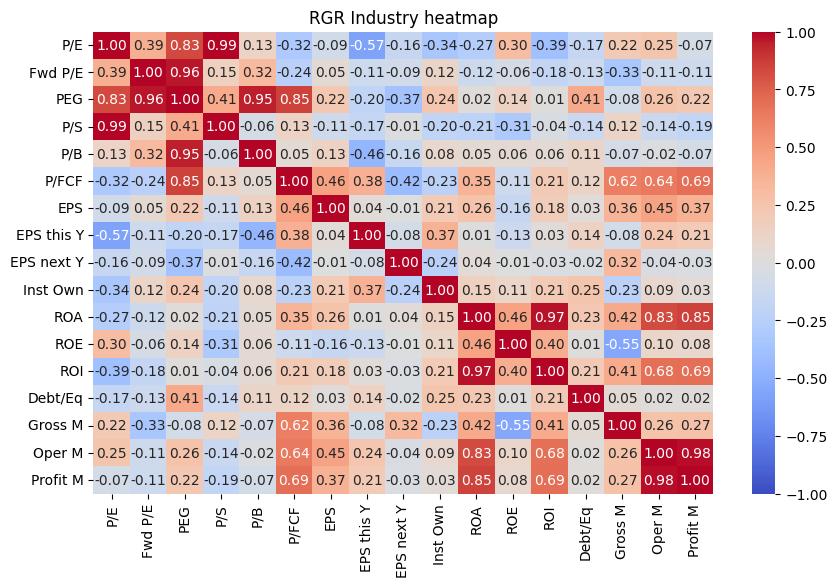

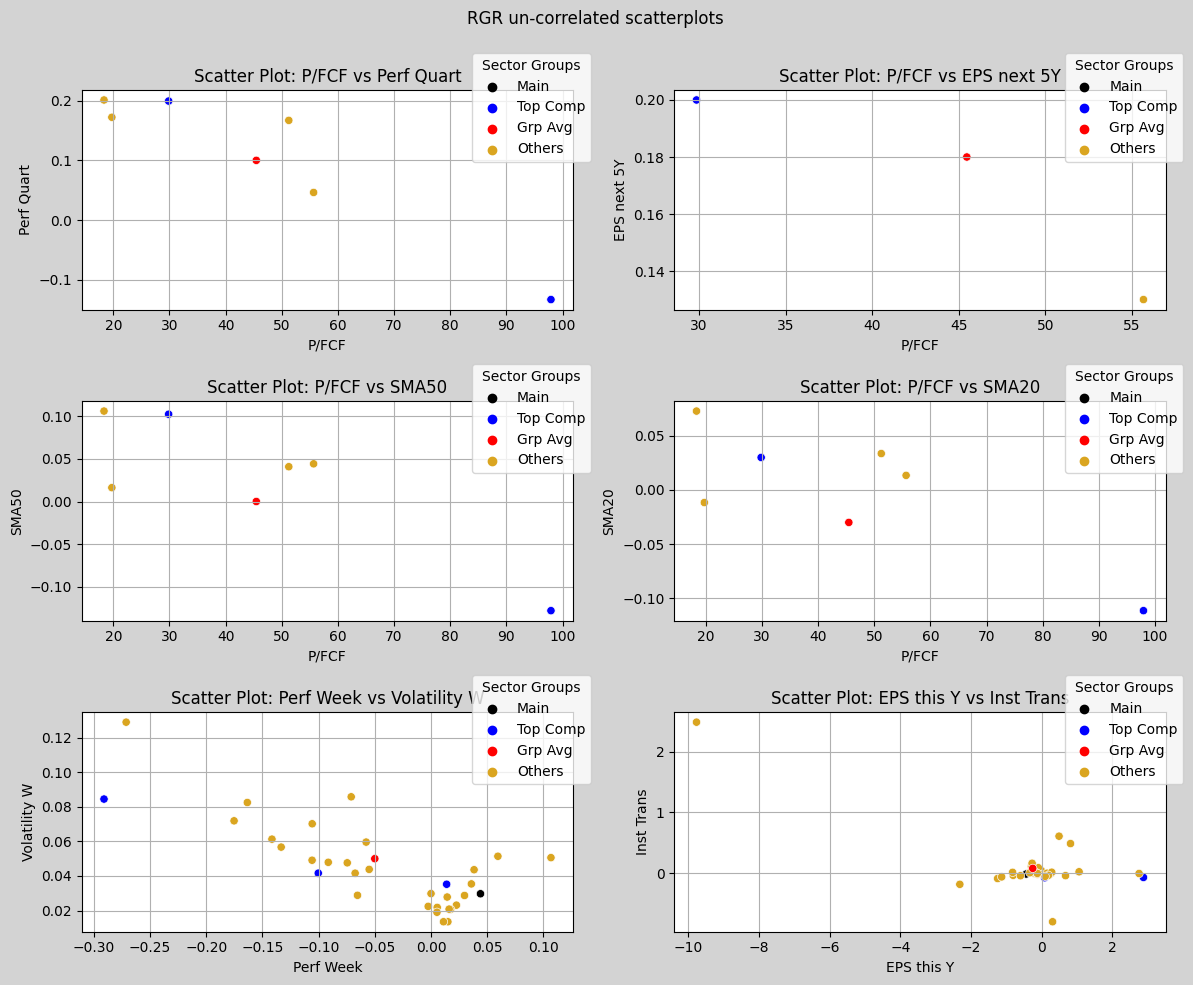

In [16]:
fv.base_charting(ranked_stock_info)